In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import warnings
warnings.warn("ignore")
import seaborn as sn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: ignore
  


In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [68]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

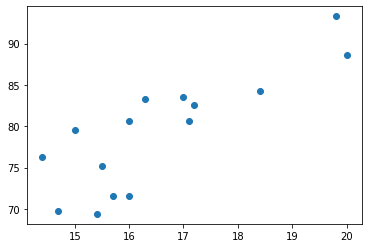

In [69]:
plt.scatter(df["Chirps/Second"],df["Ground Temperature"])

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
lr=LinearRegression(normalize=True,fit_intercept=True)

In [71]:
x=df[["Chirps/Second"]]
y=df[["Ground Temperature"]]

In [72]:

lr.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

1. Find the linear regression equation for this data.

In [73]:
print("The equation of linear regresssion is : \t",*lr.coef_,'X+',lr.intercept_)

The equation of linear regresssion is : 	 [3.410323] X+ [22.84898231]


2.Chart the original data and the equation on the chart.

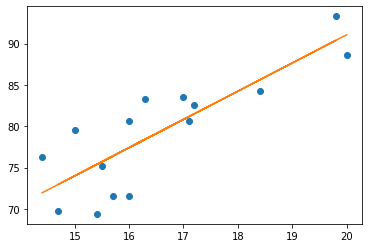

In [74]:
#plot 

plt.plot(x,y,'o')
plt.plot(x,lr.predict(x))

3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [75]:
score=lr.score(x,y)
print(score)
if score<0.8:
  print('Equation is not a good fit.')
else:
  print('Equation is a good fit.')

0.6922946529146999
Equation is not a good fit.


4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [76]:
'''y=mx+c
x=(y-c)/m'''
chirping = (95-lr.intercept_)/lr.coef_
print("Approximate rate would expect the crickets to be chirping is : \t",*chirping)

Approximate rate would expect the crickets to be chirping is : 	 [21.15665223]


5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [77]:
print('the approximate ground temperature that morning was : \t',lr.predict([[18]]))

the approximate ground temperature that morning was : 	 [[84.2347963]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [78]:
df= pd.read_fwf("/content/drive/MyDrive/Copy of brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [79]:
lr=LinearRegression()
x=df[['Brain']]
y=df[['Body']]

In [80]:
lr.fit(x,y)

LinearRegression()

In [81]:
lr.score(x,y)

0.8726620843043331

1.Find the linear regression equation for this data for brain weight to body weight.

In [82]:
print("The equation of linear regresssion is : ",*lr.coef_,'X+',lr.intercept_)

The equation of linear regresssion is :  [0.96649637] X+ [91.00439621]


2.Chart the original data and the equation on the chart.

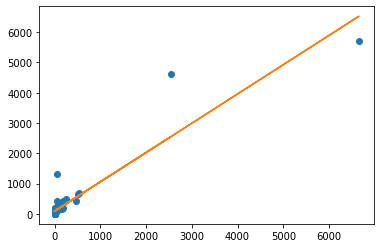

In [83]:
plt.plot(x,y,"o")
plt.plot(x,lr.predict(x))

3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlatio

In [84]:
score=lr.score(x,y)
print(score)
if score<0.8:
  print('Equation is not a good fit.')
else:
  print('Equation is a good fit.')

0.8726620843043331
Equation is a good fit.


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [85]:
df = pd.read_fwf("/content/drive/MyDrive/Copy of salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


1.Find the linear regression equation for this data using columns 1-5 to column 6

In [86]:
lr=LinearRegression()
x=df.drop("Salary",axis=1)
y=df.Salary

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [88]:
lr.fit(x_train,y_train)

LinearRegression()

In [89]:
lr.score(x_test,y_test)

0.8828228817754309

Find the selection of columns with the best  R2  score.

In [90]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


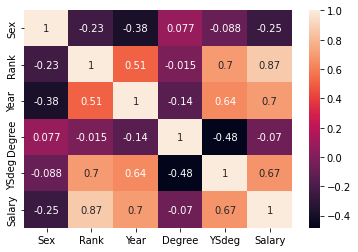

In [91]:
import seaborn as sn
sn.heatmap(df.corr(),annot=True)

In [92]:
#corr with sex and salery is very low

In [93]:
scores={}
from sklearn.model_selection import train_test_split
names=["Sex", "Rank", "Year", "Degree", "YSdeg"]
for i in range(len(names)):
  x=df[[names[i]]]
  y=df["Salary"]
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
  model = LinearRegression().fit(x_train, y_train)
  score=model.score(x,y)
  scores[names[i]] = score*100
  print(f"The equation of linear regresssion for {names[i]} is :",*model.coef_,' x +',model.intercept_)
  print(f'\nModel scores for different features are : {scores}')
  print("*"*100)

The equation of linear regresssion for Sex is : -4071.7709677419352  x + 24251.870967741932

Model scores for different features are : {'Sex': 4.882485825656834}
****************************************************************************************************
The equation of linear regresssion for Rank is : 5404.2762237762245  x + 12186.580419580416

Model scores for different features are : {'Sex': 4.882485825656834, 'Rank': 73.58493859793565}
****************************************************************************************************
The equation of linear regresssion for Year is : 660.206056195139  x + 18605.108530722067

Model scores for different features are : {'Sex': 4.882485825656834, 'Rank': 73.58493859793565, 'Year': 48.163583156067226}
****************************************************************************************************
The equation of linear regresssion for Degree is : -978.7076923076913  x + 23879.399999999998

Model scores for different features 

3.Report whether sex is a factor in salary.

In [94]:
#Since the model score with the Sex as feature is very low (i.e. 4.88), it can't be a significant factor in salary.